# Introduction
In this assignment we will find the potential distribution in a copper plate if it is excited with a potential of 1V using a wire. We would also find the flow of current through the resistor and plot this functions.

We would solve for the potential distribution using the Laplace's equation.

For Dc currents,
$$\nabla^2\phi = 0$$

# Procedure

## Part - 1

In this assignment, we use a wire of radius 0.35cm to excite the copper plate with a potential of 1V. Hence, initially the potential contour would look like a circle with radius 0.35cm centered in the centre of the square plate.


In [1]:
#Importing required libraries
from pylab import *
import mpl_toolkits.mplot3d.axes3d as p3
import warnings
warnings.filterwarnings('ignore')

Nx=30 # size along x
Ny=30 # size along y
radius=0.35 # radius of central lead
Niter=2000 # number of iterations to perform

phi = np.zeros((Ny,Nx))        #initialising potential array
y = linspace(-0.5,0.5,Ny)      #defining x,y coordinates 
x = linspace(-0.5,0.5,Nx)
Y, X = meshgrid(y, x)

#initialising potential of the circle of radius 0.35 to 1V
ii = where(square(X) + square(Y) <= pow(radius, 2))
phi[ii] = 1.0

#plotting the potential contour of the copper plate at the initial state
fig, (ax1) = plt.subplots(nrows=1)
plt1 = ax1.contourf(Y, X, phi, cmap="RdBu_r")
title("Contour Plot of $\phi$")
xlabel("$x$")
ylabel("$y$")
ax = gca()
fig.colorbar(plt1, ax=ax, orientation='vertical')
show()

## Part - 2

In this part we would be plotting error vs number of iterations.

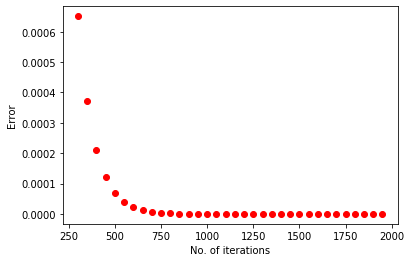

In [2]:
errors = zeros(Niter)  # initialise error array to zeros

for j in range(Niter):
    oldphi = phi.copy()  #making a copy of phi array to find the error
    
    #updating phi array ()
    phi[1:-1, 1:-1] = 0.25*(phi[1:-1, 0:-2]+phi[1:-1, 2:]+phi[0:-2, 1:-1]+phi[2:, 1:-1])

    phi[1:-1, 0] = phi[1:-1, 1]  # Left edge
    phi[1:-1, -1] = phi[1:-1, -2]  # right edge
    phi[0, :] = phi[1, :]  # Top edge

    # Assign 1 V to electrode region
    phi[ii] = 1.0
    
    # Appending errors for each iterations
    errors[j] = (abs(phi-oldphi)).max()
    
#plotting error after every 50th iteration
f = figure()
ax = f.add_subplot(111)
ax.plot(range(Niter)[300::50], errors[300::50], 'or')
xlabel('No. of iterations')
ylabel('Error')
show()

Here, we can see that the error in the $\phi$ varies exponentially with the number of iterations.
The equation for the error is given as,
$$error = y = Ae^{Bx}$$
After taking 'log' on both sides we see that the equation becomes,
$$log{y} = log{A} + Bx$$
Hence, the semilog plot of the error would be linear.

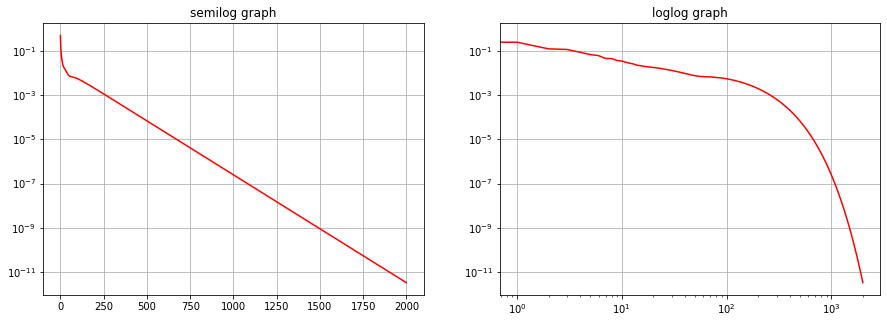

In [3]:
#plotting the error vs no. of iterations in both semilog and log-log axis
f1 = figure(figsize=(15,5))
ax = f1.add_subplot(121)
ax2 = f1.add_subplot(122)

ax.semilogy(range(Niter),errors,'r',label='err')
ax.title.set_text('semilog graph')
ax.grid()

ax2.loglog(range(Niter),errors,'r',label='err')
ax2.title.set_text('loglog graph')
ax2.grid()

show()

## Part - 3

In this part, we would plot and see the variation of potential in the copper plate at the steady state.

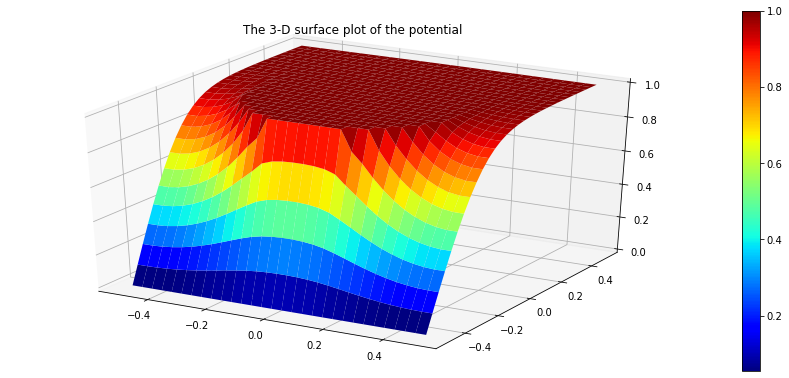

In [4]:
#plotting the 3-D surface plot of the potential at steady state
fig2=figure(figsize=(12,5)) # open a new figure
ax=p3.Axes3D(fig2) # Axes3D is the means to do a surface plot
title('The 3-D surface plot of the potential')
surf = ax.plot_surface(-Y, -X, phi, rstride=1, cstride=1, cmap=cm.jet)
fig2.colorbar(surf, orientation='vertical')
show()

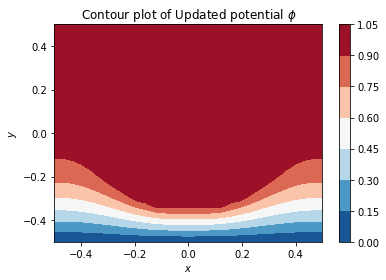

In [5]:
#plotting the potential contour of the copper plate at steady state
fig3 = figure()
ax = fig3.add_subplot(111)
plt1 = ax.contourf(-Y, -X, phi, cmap="RdBu_r")
title("Contour plot of Updated potential $\phi$")
xlabel("$x$")
ylabel("$y$")
ax = gca()
fig3.colorbar(plt1, ax=ax, orientation='vertical')
show()

## Part - 4

In this part, we will be calculating the values of A and B using the $~lstsq$ function, and plot the error function using these values.

In [6]:
#function to find the values of A and B using the error vector
def fitForError(errors, x):
    A = zeros((len(errors), 2))
    A[:, 0] = 1
    A[:, 1] = x
    return A, lstsq(A, log(errors), rcond=None)[0]

#function to compute error using log(A) and B values
def computeErrorFit(M, c):
    return exp(M.dot(c))

M1, c1 = fitForError(errors, range(Niter))  # fit1 - taking all iterations
M2, c2 = fitForError(errors[500:], range(Niter)[500:])  # fit2 - taking iterations > 500

print("Fit1 : A = %g , B = %g" % ((exp(c1[0]), c1[1])))
print("Fit2 : A = %g , B = %g" % ((exp(c2[0]), c2[1])))

print("The time Constant (1/B) all iterations: %g" % (abs(1/c1[1])))
print("The time Constant (1/B) for higher iterations (> 500) : %g" % (abs(1/c2[1])))

Fit1 : A = 0.0191057 , B = -0.011252
Fit2 : A = 0.0190658 , B = -0.0112499
The time Constant (1/B) all iterations: 88.8727
The time Constant (1/B) for higher iterations (> 500) : 88.89


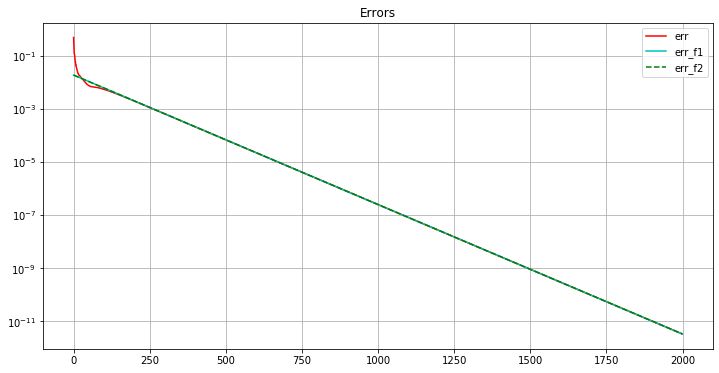

In [7]:
#calculating the error vector using the two fits
err_f1 = (exp(c1[0])*(exp(c1[1]*range(Niter))))
err_f2 = (exp(c2[0])*(exp(c2[1]*range(Niter))))

#plotting the calculated error using fits and original error
f4 = figure(figsize=(12,6))
ax = f4.add_subplot(111)

ax.semilogy(range(Niter),errors,'r',label='err')
ax.semilogy(range(Niter),err_f1,'c',label='err_f1')
ax.semilogy(range(Niter),err_f2,'--g',label='err_f2')

title('Errors')
ax.grid()
ax.legend()
show()

## Part - 5

In this part, we would find the current through the copper plate and plot it using $~quiver$ function.

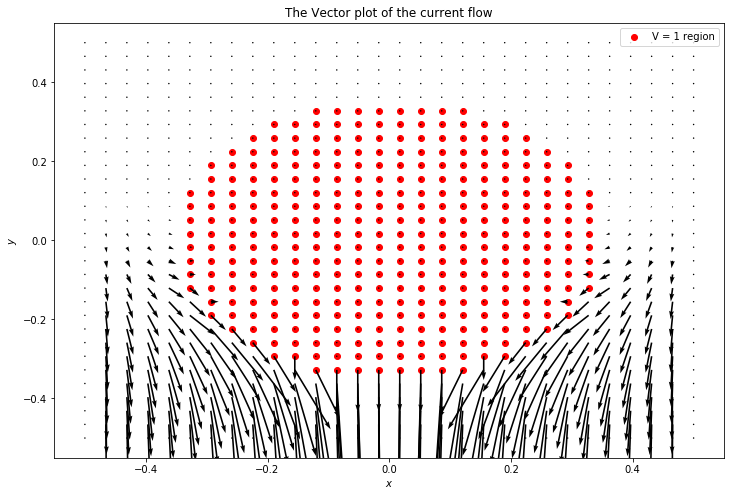

In [8]:
#initialising Jx, Jy arrays
Jx = zeros((Ny, Nx))
Jy = zeros((Ny, Nx))

#filling Jx, Jy arrays with conductivity = 1
Jx[1:-1, 1:-1] = 0.5*(phi[1:-1, 0:-2] - phi[1:-1, 2:])
Jy[1:-1, 1:-1] = 0.5*(phi[2:, 1:-1] - phi[0:-2, 1:-1])

#plotting J using quiver function
f5 = figure(figsize=(12,8))
ax = f5.add_subplot(111)

ax.scatter(x[ii[0]], y[ii[1]], color='r', label="V = 1 region")

ax.quiver(-Y, -X, Jx, Jy)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.legend()
title("The Vector plot of the current flow")
show()

# Conclusion

To conclude , Most of the current is in the narrow region at the bottom.So that is what will get strongly heated. Since there is almost no current in the upper region of plate,the bottom part of the plate gets hotter and temperature increases in down
region of the plate.

We can see that the best method to solve for $\phi$ and current is to
increase $N_x$ and $N_y$ to very high values(100 or $\geq$
100)and increase the no of iterations too, so that we get accurate
answers i.e currents in the resistor.

But that would make the code run much more slower as, the no. of iterations increases, the decrease in the error also decreases. So, we facing a trade-off kind situation here.